In [24]:
import wandb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

api = wandb.Api()

# NO REHERSAL

In [25]:
runs = api.runs("qba/no rehersal small net MNIST Task IL")

In [26]:
noise_rehersal_runs = [
'lively-plant-27',
'worldly-shape-26',
'neat-valley-25',
'glamorous-elevator-24',
'deep-yogurt-23',
'feasible-wave-22',]

acc_col = ['acc_task_0', 'acc_task_1', 'acc_task_2', 'acc_task_3', 'acc_task_4']
cols = ['acc_task_0', 'acc_task_1', 'acc_task_2', 'acc_task_3', 'acc_task_4', '_step']

In [27]:
dfs = {}

for i in range(len(runs)):
    print(f"{runs[i].name}")
    if runs[i].name in noise_rehersal_runs:
        dfs[i] = runs[i].history(samples=1000)
        print(len(dfs[i][cols].dropna().sort_values(by='_step').set_index('_step')))

lively-plant-27
45
worldly-shape-26
45
neat-valley-25
45
glamorous-elevator-24
45
deep-yogurt-23
45
feasible-wave-22
45
distinctive-frost-20
fallen-eon-19
bright-mountain-18
bright-resonance-17
prime-monkey-16
tough-dawn-15
brisk-bird-14
elated-wood-13
dutiful-snowball-12
cerulean-bird-11
proud-sun-3
playful-capybara-2
lyric-snowflake-1


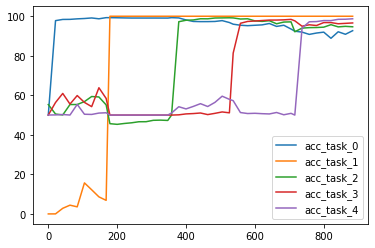

In [28]:
df = dfs[0]

for i in range(len(acc_col)):
    plt.plot(df[[acc_col[i],'_step']].dropna().sort_values(by='_step').set_index('_step'))

plt.legend(acc_col)
plt.show()

<AxesSubplot:xlabel='index'>

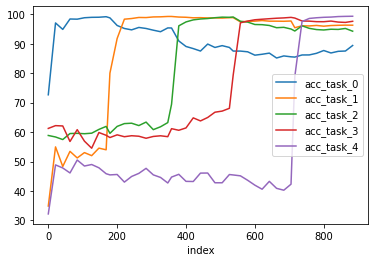

In [29]:
df_all_runs = pd.DataFrame()

for i in range(len(dfs)):
    df_all_runs = pd.concat([df_all_runs, dfs[i][acc_col].dropna()])

df_all_runs.reset_index().groupby("index").mean().plot()

# REHERSAL

In [30]:
runs = api.runs("qba/rehersal small net MNIST Task IL")

In [31]:
noise_rehersal_runs = ['glamorous-cherry-22',
'graceful-sun-21',
'blooming-sponge-20',
'fearless-frost-19',
'eager-rain-18',]

acc_col = ['acc_task_0', 'acc_task_1', 'acc_task_2', 'acc_task_3', 'acc_task_4']
cols = ['acc_task_0', 'acc_task_1', 'acc_task_2', 'acc_task_3', 'acc_task_4', '_step']

In [32]:
dfs_rehersal = {}

for i in range(len(runs)):
    print(f"{runs[i].name}")
    if runs[i].name in noise_rehersal_runs:
        dfs_rehersal[i] = runs[i].history(samples=1000)
        print(len(dfs[i][cols].dropna().sort_values(by='_step').set_index('_step')))

glamorous-cherry-22
45
graceful-sun-21
45
blooming-sponge-20
45
fearless-frost-19
45
eager-rain-18
45
lyric-snow-17
leafy-serenity-16
clear-dragon-15
fragrant-frog-14
helpful-sky-13
comfy-oath-12
graceful-plasma-11
absurd-dew-10
restful-snow-9
fearless-breeze-8
daily-plant-7
leafy-disco-6
apricot-glitter-5
iconic-firefly-4
warm-meadow-3


# Single run

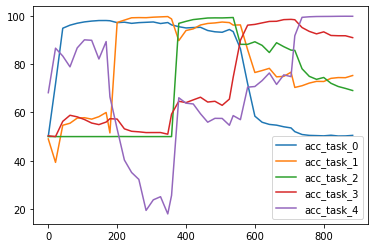

In [33]:
df = dfs_rehersal[0]

for i in range(len(acc_col)):
    plt.plot(df[[acc_col[i],'_step']].dropna().sort_values(by='_step').set_index('_step'))

plt.legend(acc_col)
plt.show()

# All runs mean

<AxesSubplot:xlabel='index'>

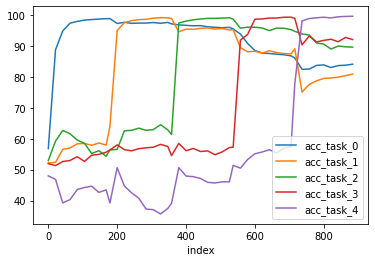

In [42]:
df_all_runs_rehersal = pd.DataFrame()

for i in range(len(dfs_rehersal)):
    df_all_runs_rehersal = pd.concat([df_all_runs_rehersal, dfs_rehersal[i][acc_col].dropna()])

df_all_runs_rehersal.reset_index().groupby("index").mean().plot()

# Comparison

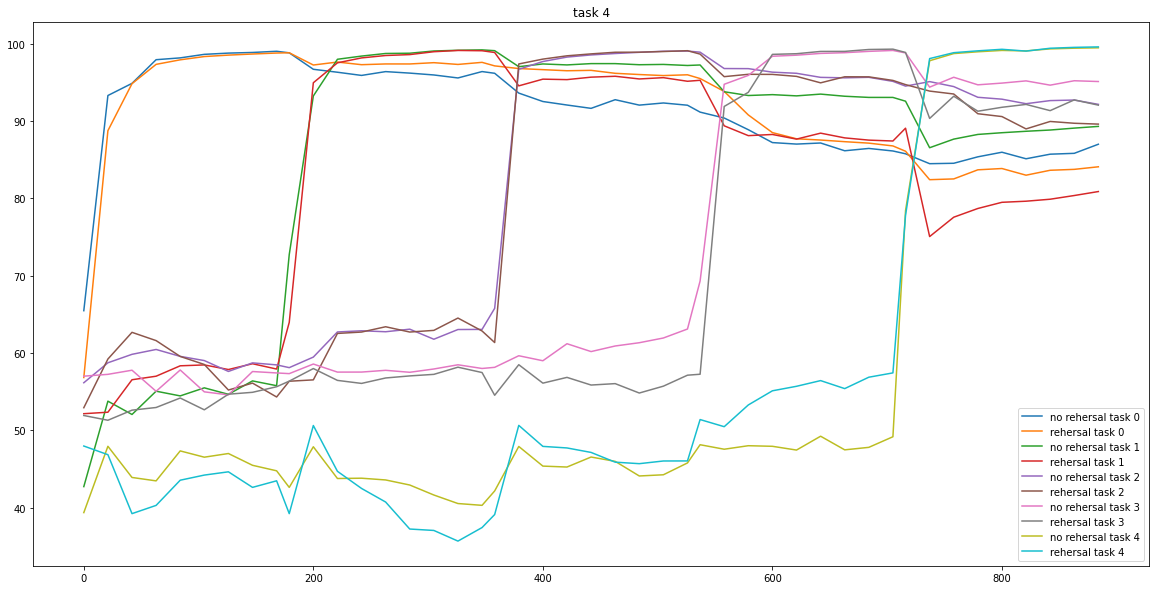

In [61]:
plt.figure(figsize=(20,10))
legend = []

for task_num in range(5):
    plt.plot(df_all_runs.reset_index().groupby("index").mean()[acc_col[task_num]])
    plt.plot(df_all_runs_rehersal.reset_index().groupby("index").mean()[acc_col[task_num]])
    legend.extend(([f"no rehersal task {task_num}", f"rehersal task {task_num}"]))
    plt.title(f"task {task_num}")
plt.legend(legend)
plt.show()

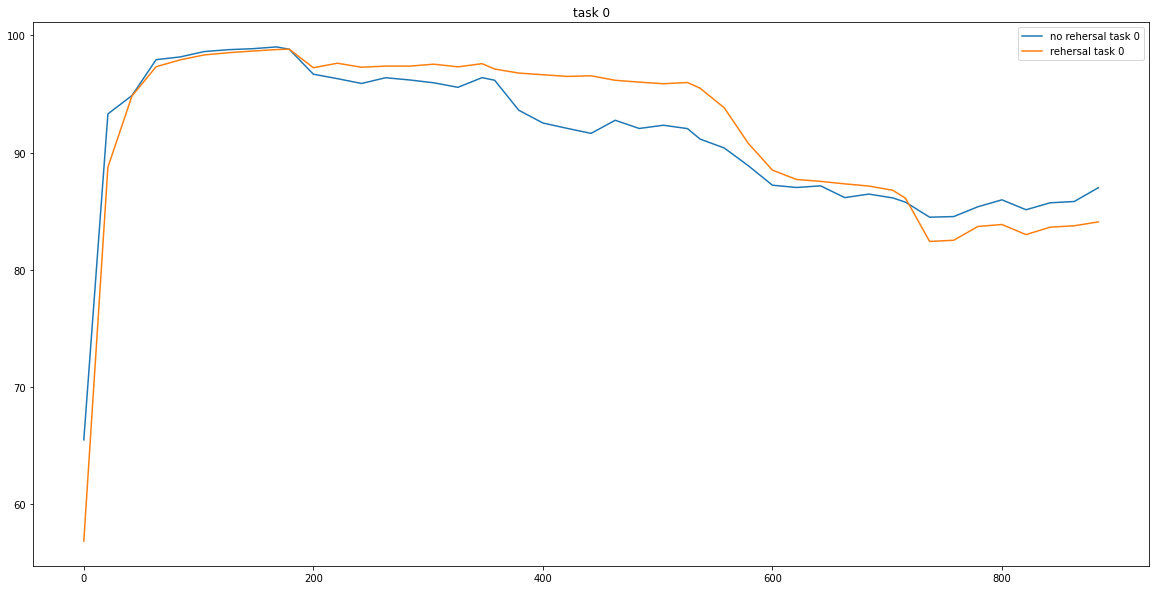

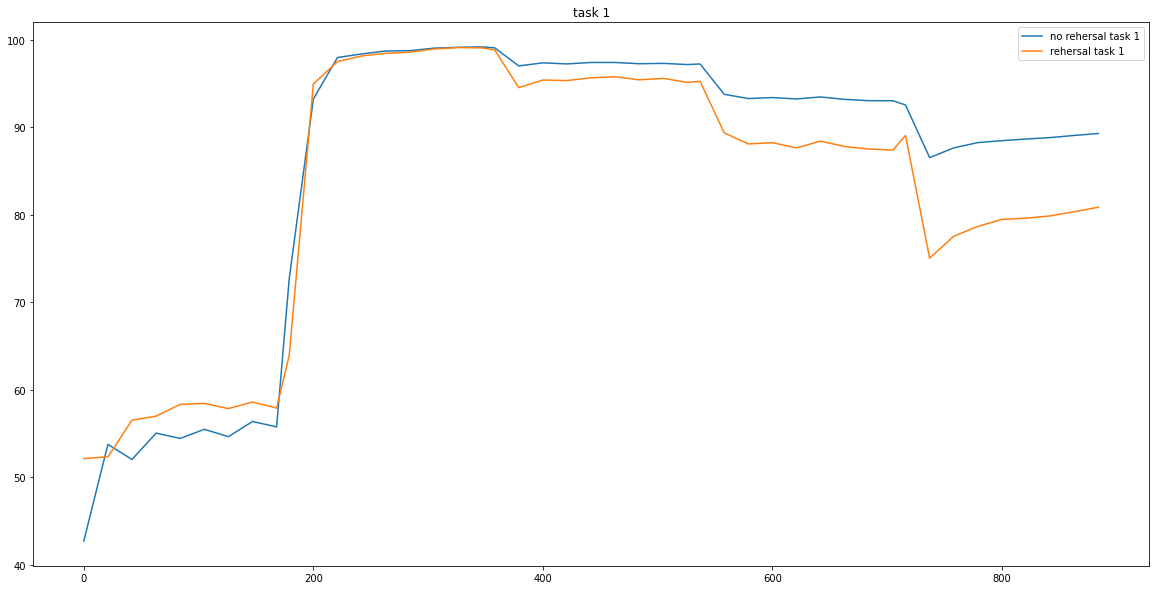

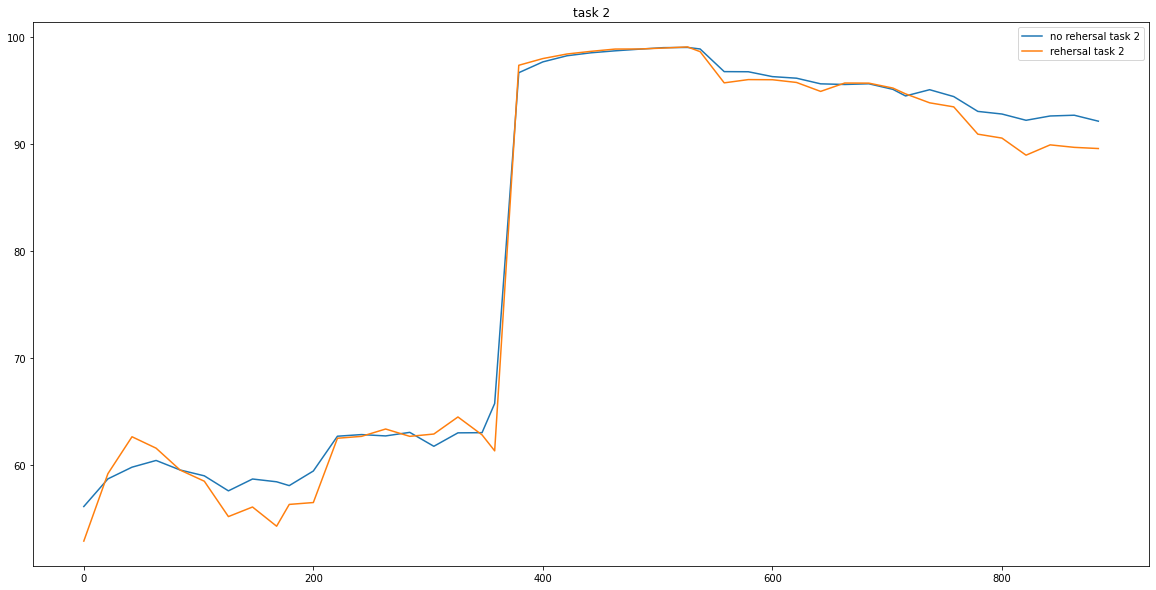

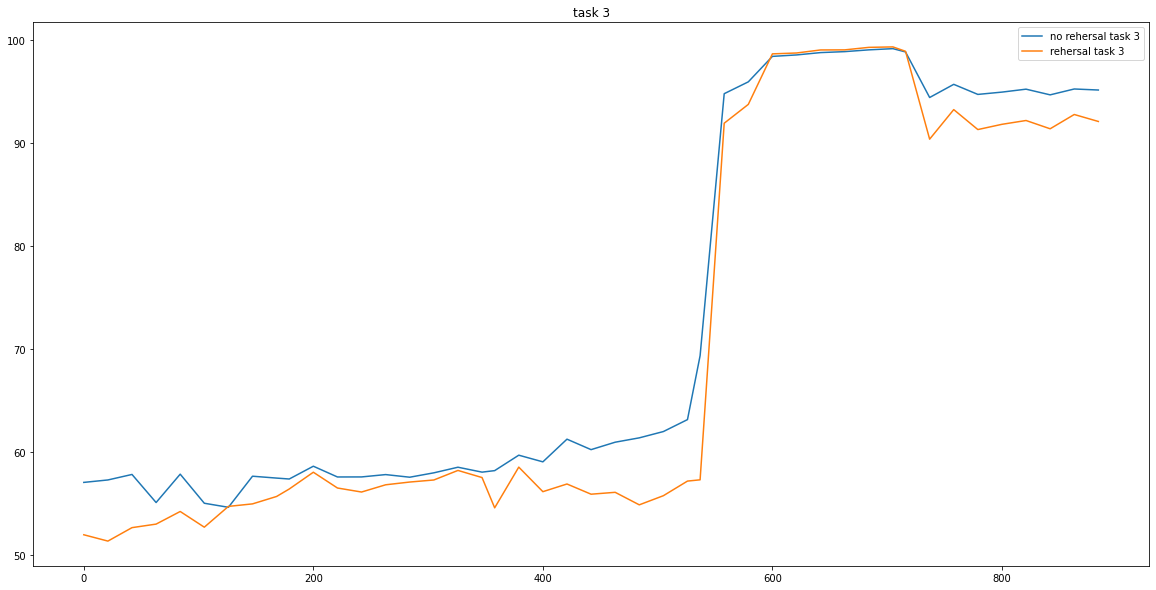

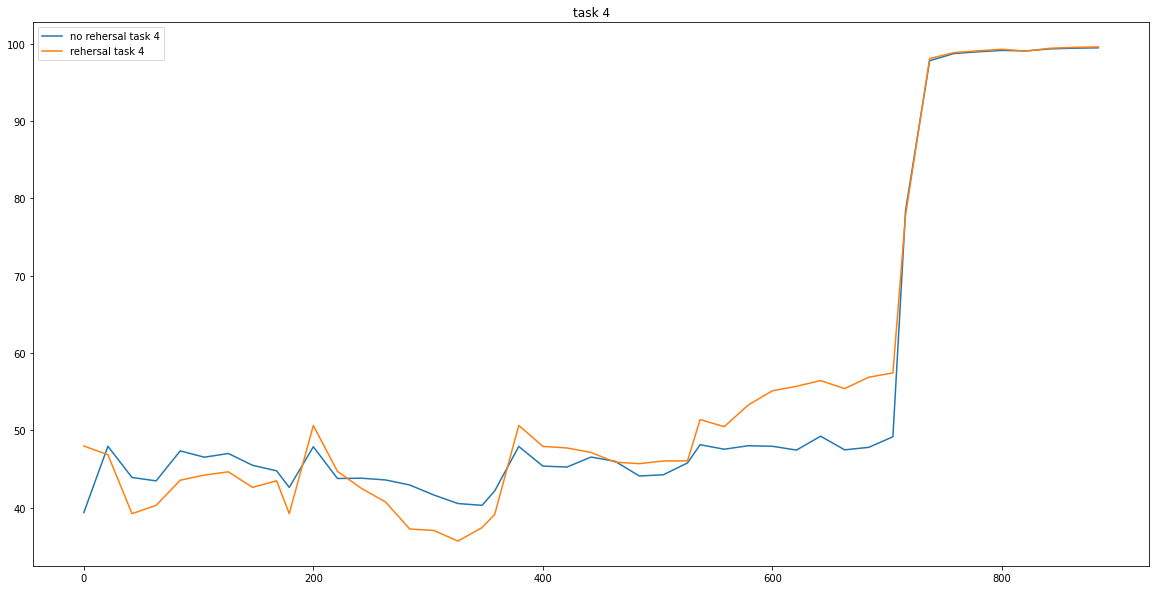

In [63]:
for task_num in range(5):
    plt.figure(figsize=(20,10))
    plt.plot(df_all_runs.reset_index().groupby("index").mean()[acc_col[task_num]])
    plt.plot(df_all_runs_rehersal.reset_index().groupby("index").mean()[acc_col[task_num]])
    plt.legend([f"no rehersal task {task_num}", f"rehersal task {task_num}"])
    plt.title(f"task {task_num}")
    plt.show()